In [7]:
from data import MNIST
from mmdew_adapter import MMDEWAdapter
from mmdew.mmd import MMD

In [8]:
from sklearn import preprocessing
import numpy as np
def preprocess(x):
    return preprocessing.minmax_scale(x)
mnist = MNIST(preprocess=preprocess)

In [9]:

cps = mnist._change_points
true_cps = [i for i, x in enumerate(cps) if x]
fst_cps = true_cps[0]
snd_cps = true_cps[1]
fst_cps
print(true_cps)

[7141, 14017, 20920, 27233, 34057, 41934, 48759, 56052, 63042]


In [10]:
cps[0]

False

In [11]:


mymmd=MMD(biased=True)


mmd_nys = MMDEWAdapter(1, alpha=1e-16)
pre_train_data = np.array(
                [mnist.next_sample()[0] for _ in range(100)]
            ).squeeze(1)
mmd_nys.pre_train(data=pre_train_data)
mnist.restart()

In [12]:
import pandas as pd
x = []
y = []
for i in range(snd_cps +1):
    valid = False
    #print(i)
    next_sample, _, is_change = mnist.next_sample()
    mmd_nys.add_element(next_sample)
    if i > fst_cps:
        split = 1
        ucap_sum = 0
        bucket_index = 0
        finished = False
        while bucket_index  < len(mmd_nys.detector.buckets) and not finished:
            #print("hello")
            ucap_sum += mmd_nys.detector.buckets[bucket_index].uncompressed_capacity
            print("bucket index:", bucket_index)
            print("ucap sum:", ucap_sum)
            if ucap_sum <= fst_cps:

                split = bucket_index + 1
                bucket_index += 1
            else:
                finished = True
        bsstring = ""
        for j in range(0, len(mmd_nys.detector.buckets)):
            bsstring += "(" + str(mmd_nys.detector.buckets[j].uncompressed_capacity) + " " + str(len(mmd_nys.detector.buckets[j].weights)) + ")"
        print(split)
        print(len(mmd_nys.detector.buckets))
        print("element sum", ucap_sum)

        if len(mmd_nys.detector.buckets) > 1:
            valid = True
            mmdcalc = mmd_nys.detector.mmd(split)[0]
        print(f"elements read: {i+1}, current bs stream length: {len(mmd_nys.detector.buckets)} stream: {bsstring} mmd between pre and post: {mmdcalc} with a split at: {split}")

    else:
        print(f"elements read: {i+1}")
    x.append(i)
    if not valid:
        y.append(float("NaN"))
    else:

        y.append(mmdcalc)

elements read: 1
elements read: 2
elements read: 3
elements read: 4
elements read: 5
elements read: 6
elements read: 7
elements read: 8
elements read: 9
elements read: 10
elements read: 11
elements read: 12
elements read: 13
elements read: 14
elements read: 15
elements read: 16
elements read: 17
elements read: 18
elements read: 19
elements read: 20
elements read: 21
elements read: 22
elements read: 23
elements read: 24
elements read: 25
elements read: 26
elements read: 27
elements read: 28
elements read: 29
elements read: 30
elements read: 31
elements read: 32
elements read: 33
elements read: 34
elements read: 35
elements read: 36
elements read: 37
elements read: 38
elements read: 39
elements read: 40
elements read: 41
elements read: 42
elements read: 43
elements read: 44
elements read: 45
elements read: 46
elements read: 47
elements read: 48
elements read: 49
elements read: 50
elements read: 51
elements read: 52
elements read: 53
elements read: 54
elements read: 55
elements read: 56
e

elements read: 112
elements read: 113
elements read: 114
elements read: 115
elements read: 116
elements read: 117
elements read: 118
elements read: 119
elements read: 120
elements read: 121
elements read: 122
elements read: 123
elements read: 124
elements read: 125
elements read: 126
elements read: 127
elements read: 128
elements read: 129
elements read: 130
elements read: 131
elements read: 132
elements read: 133
elements read: 134
elements read: 135
elements read: 136
elements read: 137
elements read: 138
elements read: 139
elements read: 140
elements read: 141
elements read: 142
elements read: 143
elements read: 144
elements read: 145
elements read: 146
elements read: 147
elements read: 148
elements read: 149
elements read: 150
elements read: 151
elements read: 152
elements read: 153
elements read: 154
elements read: 155
elements read: 156
elements read: 157
elements read: 158
elements read: 159
elements read: 160
elements read: 161
elements read: 162
elements read: 163
elements rea

[1.7591310938179604e-05,
 1.7840342721027005e-05,
 1.8088858531446442e-05,
 1.781411164281026e-05,
 1.8062133157056485e-05,
 1.8309641425547026e-05,
 1.8556637652921506e-05,
 1.7501582013994556e-05,
 1.7748884763976046e-05,
 1.7995676955299556e-05,
 1.8241959783805394e-05,
 1.7969236468341358e-05,
 1.821503166176314e-05,
 1.8460320172736694e-05,
 1.8705103185927296e-05,
 1.7658400951019164e-05,
 1.7903487400322025e-05,
 1.8148069808224166e-05,
 1.8392149350775195e-05,
 1.812142757398495e-05,
 1.8365026024495172e-05,
 1.8351495267869364e-05,
 1.8594354234517172e-05,
 1.8324495345021805e-05,
 1.856687684165453e-05,
 1.8553169396338465e-05,
 1.8794816589442566e-05,
 1.8780892791006224e-05,
 1.902180864373277e-05,
 1.900766990774473e-05,
 1.924785736829014e-05,
 1.7201116967900447e-05,
 1.7442626200022242e-05,
 1.743010584794532e-05,
 1.7670886362661553e-05,
 1.765814901041164e-05,
 1.7898203736514303e-05,
 1.788525079282811e-05,
 1.8124582644384634e-05,
 1.760739135529858e-05,
 1.78465088

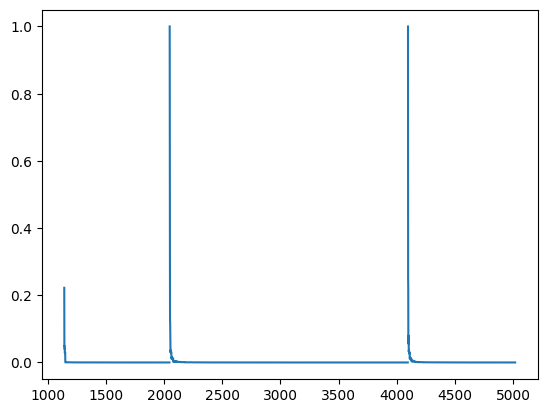

In [19]:
import matplotlib.pyplot as plt
x_np = np.array(x)
y_np = np.array(y)
# def convert_to_float(s):
#     if s == 'nan':
#         return np.nan
#     else:
#         # Extract the first value from the tuple-like string
#         float_val = float(s.split(',')[0].strip('('))
#         return float_val



plt.plot(x_np,y_np)
plt.show()


In [ ]:
print(y)

['(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)', '(2.6101972094233407e-06, 8192, 5853)',

In [ ]:
max_index = np.nanargmax(y_np_float)

print(max_index)

1024


In [ ]:
print(y_np[100:])



['(2.6101972094233407e-06, 8192, 5853)'
 '(2.6101972094233407e-06, 8192, 5853)'
 '(2.6101972094233407e-06, 8192, 5853)' ... '0.2222229225766852'
 '0.06250070035446406' '0.08000070035446996']


In [ ]:
k = y_np[10000].split(",")

IndexError: index 10000 is out of bounds for axis 0 with size 8197

In [ ]:
y_np[1000]

'nan'

In [ ]:
k[0][1:]

'1.1976957441986184e-05'

In [ ]:
float(k[0][1:])

1.1976957441986184e-05